In [23]:
!pip install pandas
!pip install matplotlib


--- Health Survey Report ---

Total respondents: 20
Hypertension prevalence: 40.0%

Smoking rate by gender (%):
smoker    no   yes
gender            
F       80.0  20.0
M       40.0  60.0 

Average BMI by age group:
age_group
18–29    22.3
30–44    26.0
45–59    29.1
60+      31.7 

BMI distribution (%):
BMI_category
Obese         35.0
Overweight    35.0
Normal        30.0


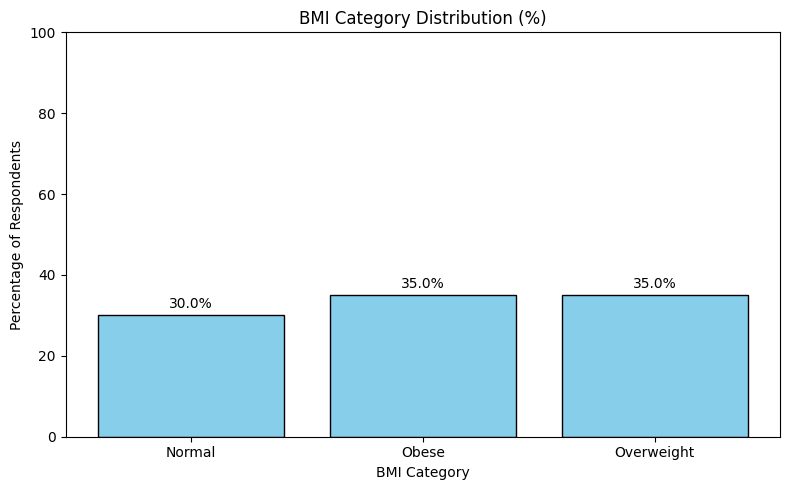

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def main():
    df = pd.read_csv('/content/survey_data.csv')

    df['height_m'] = df['height_cm'] / 100
    df['BMI'] = df['weight_kg'] / (df['height_m'] ** 2)
    df['BMI_category'] = df['BMI'].apply(classify_bmi)

    smoking_by_gender = df.groupby('gender')['smoker'].value_counts(normalize=True).unstack() * 100

    df['hypertensive'] = (df['systolic_bp'] >= 140) | (df['diastolic_bp'] >= 90)
    hypertension_rate = df['hypertensive'].mean() * 100

    bins = [0, 29, 44, 59, 120]
    labels = ['18–29', '30–44', '45–59', '60+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
    bmi_by_age_group = df.groupby('age_group', observed=True)['BMI'].mean()

    print("\n--- Health Survey Report ---\n")
    print(f"Total respondents: {len(df)}")
    print(f"Hypertension prevalence: {hypertension_rate:.1f}%\n")

    print("Smoking rate by gender (%):")
    print(smoking_by_gender.round(1).fillna(0).to_string(), "\n")

    print("Average BMI by age group:")
    print(bmi_by_age_group.round(1).to_string(), "\n")

    bmi_counts = df['BMI_category'].value_counts(normalize=True) * 100
    print("BMI distribution (%):")
    print(bmi_counts.round(1).to_string())

    # Plot BMI Category Distribution
    bmi_counts_sorted = bmi_counts.sort_index()  # Sort to keep logical order

    plt.figure(figsize=(8, 5))
    bars = plt.bar(bmi_counts_sorted.index, bmi_counts_sorted.values, color='skyblue', edgecolor='black')
    plt.title('BMI Category Distribution (%)')
    plt.ylabel('Percentage of Respondents')
    plt.xlabel('BMI Category')
    plt.ylim(0, 100)

    # Add value labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


--- Health Survey Report ---

Total respondents: 10457
Average BMI by age group:
age_group
18–29    28.1
30–44    30.3
45–59    30.3
60+      29.5 

BMI distribution (%):
BMI_category
Obese          41.1
Overweight     32.2
Normal         25.2
Underweight     1.5


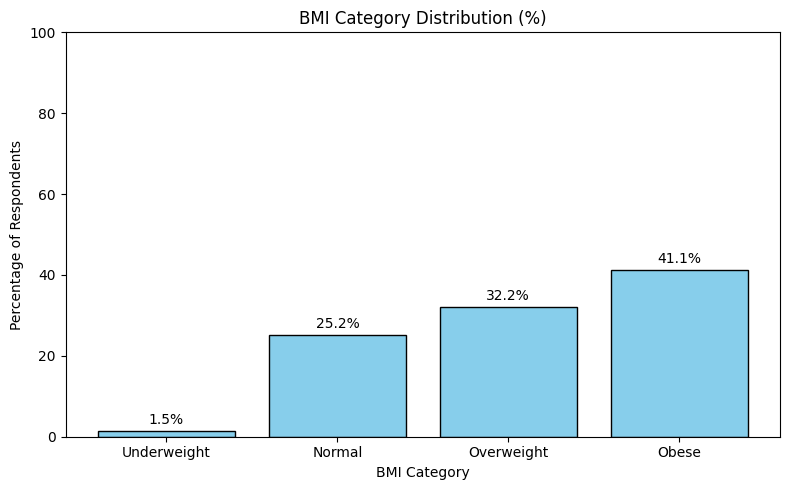

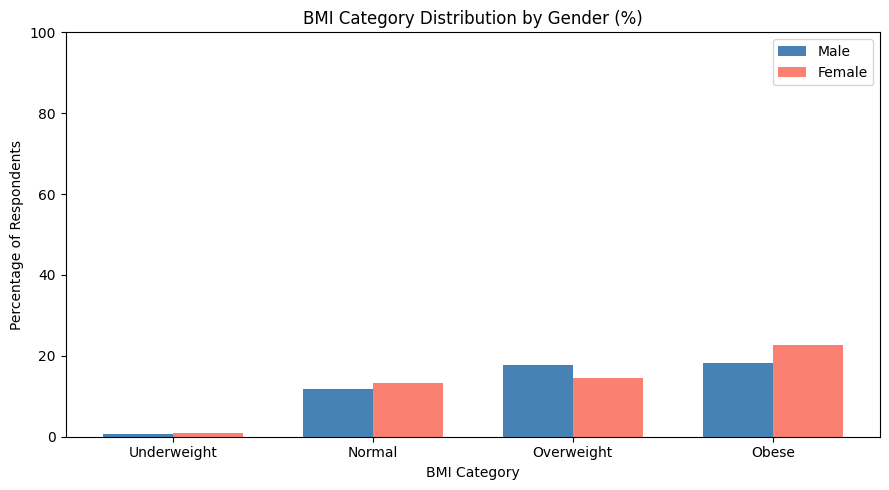

In [25]:
import pandas as pd
import matplotlib.pyplot as pl

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def load_and_combine():
    male = pd.read_csv('nhanes_bmi_male.csv')
    female = pd.read_csv('nhanes_bmi_female.csv')
    df = pd.concat([male, female], ignore_index=True)
    return df

def main():
    df = load_and_combine()

    df = df[['SEQN', 'BMXBMI', 'RIAGENDR', 'RIDAGEYR']].dropna()

    df = df.rename(columns={
        'BMXBMI': 'BMI',
        'RIAGENDR': 'gender',
        'RIDAGEYR': 'age'
    })

    # Map gender codes
    df['gender'] = df['gender'].map({1: 'M', 2: 'F'})


    df['BMI_category'] = df['BMI'].apply(classify_bmi)

    bins = [0, 29, 44, 59, 120]
    labels = ['18–29', '30–44', '45–59', '60+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
    bmi_by_age_group = df.groupby('age_group', observed=True)['BMI'].mean()

    print("\n--- Health Survey Report ---\n")
    print(f"Total respondents: {len(df)}")

    print("Average BMI by age group:")
    print(bmi_by_age_group.round(1).to_string(), "\n")

    bmi_counts = df['BMI_category'].value_counts(normalize=True) * 100
    print("BMI distribution (%):")
    print(bmi_counts.round(1).to_string())


    bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
    bmi_counts_sorted = bmi_counts.reindex(bmi_order).fillna(0)


    plt.figure(figsize=(8, 5))
    bars = plt.bar(bmi_counts_sorted.index, bmi_counts_sorted.values, color='skyblue', edgecolor='black')
    plt.title('BMI Category Distribution (%)')
    plt.ylabel('Percentage of Respondents')
    plt.xlabel('BMI Category')
    plt.ylim(0, 100)

    # Add value labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Calculate BMI category distribution by gender
    bmi_gender = df.groupby(['BMI_category', 'gender']).size().unstack(fill_value=0)
    bmi_gender_percent = bmi_gender.divide(bmi_gender.sum().sum(), axis=0) * 100

    bmi_gender_percent = bmi_gender_percent.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])

    # Plot grouped bar chart
    plt.figure(figsize=(9, 5))
    x = range(len(bmi_gender_percent))
    bar_width = 0.35

    plt.bar(
        [i - bar_width/2 for i in x],
        bmi_gender_percent['M'],
        width=bar_width,
        label='Male',
        color='steelblue'
    )
    plt.bar(
        [i + bar_width/2 for i in x],
        bmi_gender_percent['F'],
        width=bar_width,
        label='Female',
        color='salmon'
    )

    # Add chart details
    plt.xticks(x, bmi_gender_percent.index)
    plt.title('BMI Category Distribution by Gender (%)')
    plt.xlabel('BMI Category')
    plt.ylabel('Percentage of Respondents')
    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()